In [1]:
import numpy as np
import matplotlib.pyplot as plt

import SimpleITK as sitk
from medpy.metric.binary import dc

import notebook_utils

## Read the output GTV probability maps from both 3D-2D and 3D-3D networks 

In [2]:
pred_dir = "../data/Ensemble"
patiend_id = "CHMR013"
spacing = (1,1,3)

pred_2d_path = pred_dir + "/2D_Network/" + patiend_id + "/" + "predicted_ct_gtvt.nii.gz"
pred_3d_path = pred_dir + "/3D_Network/" + patiend_id + "/" + "predicted_ct_gtvt.nii.gz"
true_gtv_path = pred_dir + "/3D_Network/" + patiend_id + "/" + patiend_id + "_ct_gtvt.nii.gz"

prob_map_2d_np = sitk.GetArrayFromImage(sitk.ReadImage(pred_2d_path))
prob_map_3d_np = sitk.GetArrayFromImage(sitk.ReadImage(pred_3d_path))
true_gtv_np = sitk.GetArrayFromImage(sitk.ReadImage(true_gtv_path))

print(prob_map_2d_np.shape)
print(true_gtv_np.shape)

(48, 143, 143)
(48, 143, 143)


In [3]:
unique_elements, counts = np.unique(prob_map_2d_np, return_counts=True)
print(unique_elements.shape)
unique_elements, counts = np.unique(prob_map_3d_np, return_counts=True)
print(unique_elements.shape)

(350184,)
(812484,)


### Ground truth

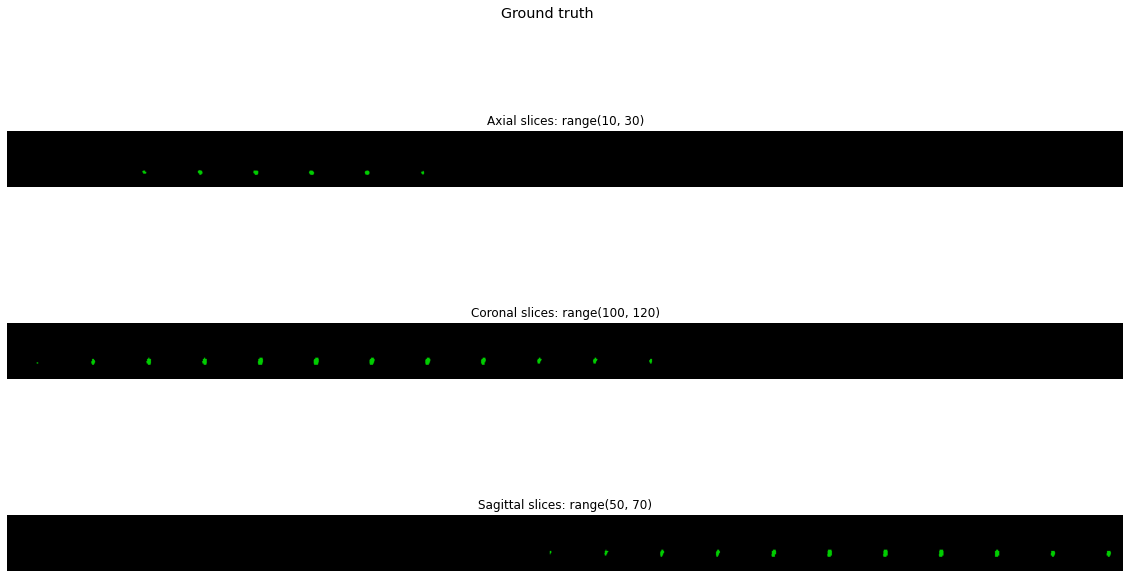

GTV DSC: 1.0


In [4]:
# Display 
notebook_utils.display_image_np(true_gtv_np, spacing=spacing, is_label=True,
                                 sagittal_idxs=range(50,70),
                                 coronal_idxs=range(100,120),
                                 axial_idxs=range(10,30),
                                title="Ground truth")

dsc = dc(true_gtv_np, true_gtv_np)
print("GTV DSC:", dsc)

### Output of the 3D-2D network

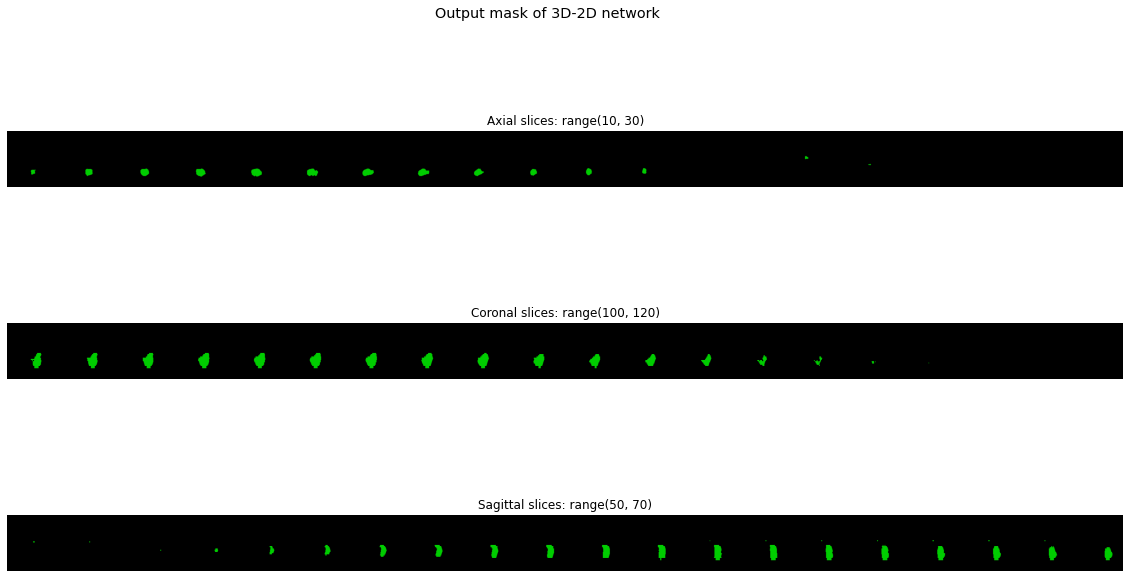

GTV DSC: 0.24966740576496674


In [5]:
# Display 
pred_mask_2d_np = prob_map_2d_np > 0.5
notebook_utils.display_image_np(pred_mask_2d_np, spacing=spacing, is_label=True,
                                 sagittal_idxs=range(50,70),
                                 coronal_idxs=range(100,120),
                                 axial_idxs=range(10,30),
                                title="Output mask of 3D-2D network")

dsc = dc(pred_mask_2d_np, true_gtv_np)
print("GTV DSC:", dsc)

### Output of the 3D-3D network

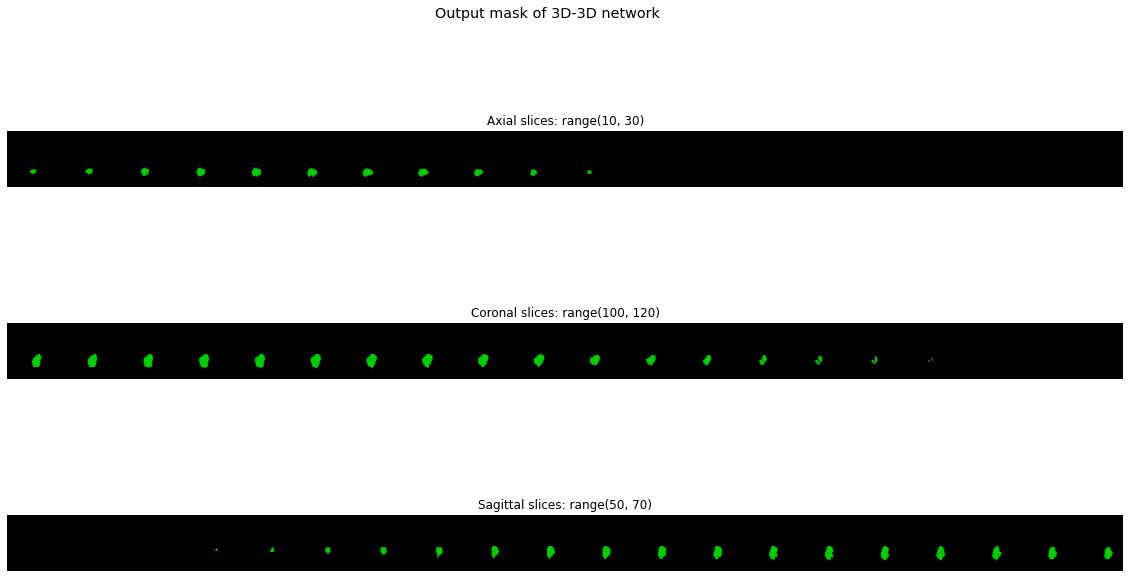

GTV DSC: 0.28820066547222933


In [6]:
# Display 
pred_mask_3d_np = prob_map_3d_np > 0.5
notebook_utils.display_image_np(pred_mask_3d_np, spacing=spacing, is_label=True,
                                 sagittal_idxs=range(50,70),
                                 coronal_idxs=range(100,120),
                                 axial_idxs=range(10,30),
                                title="Output mask of 3D-3D network")

dsc = dc(pred_mask_3d_np, true_gtv_np)
print("GTV DSC:", dsc)

## Combining the 2 outputs

### 1 Voxel-wise average

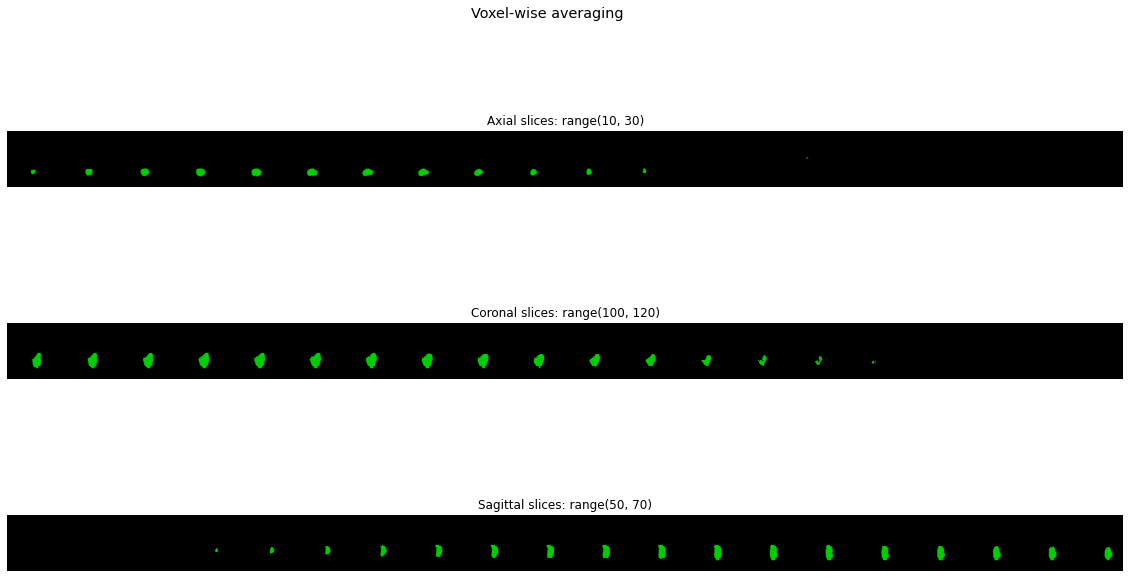

GTV DSC: 0.26854280944431197


In [7]:
def ensemble_avg_prob(prob_map_1, prob_map_2):
    output_prob_map = (prob_map_1 + prob_map_2) / 2
    output_mask = output_prob_map > 0.5
    return output_mask

output_mask = ensemble_avg_prob(prob_map_2d_np, prob_map_3d_np)


# Display
notebook_utils.display_image_np(output_mask, spacing=spacing, is_label=True,
                                 sagittal_idxs=range(50,70),
                                 coronal_idxs=range(100,120),
                                 axial_idxs=range(10,30),
                                 title="Voxel-wise averaging")

dsc = dc(output_mask, true_gtv_np)
print("GTV DSC:", dsc)

### 2 Union

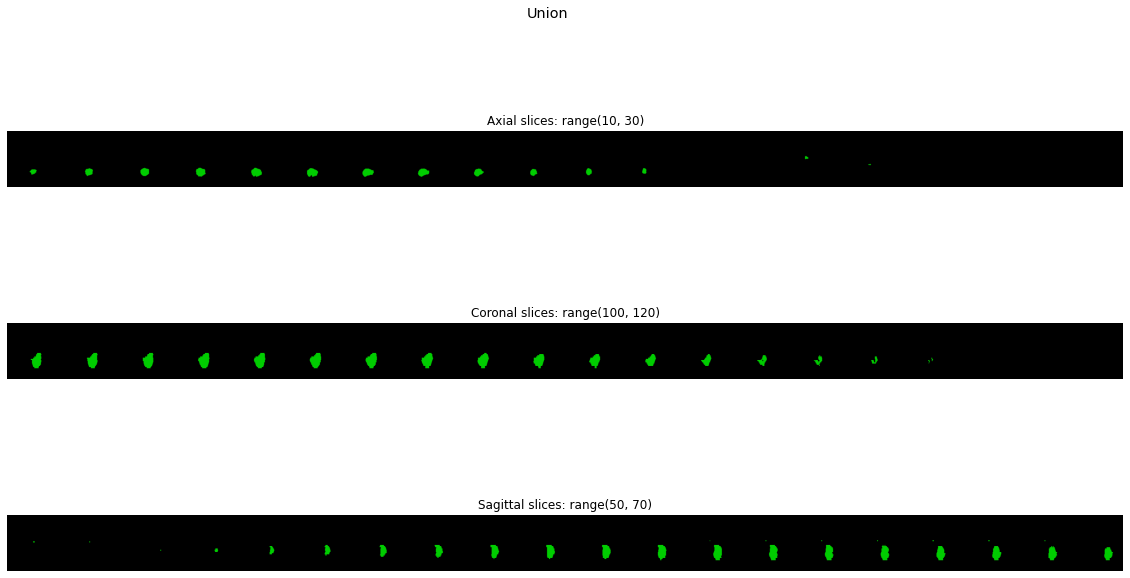

GTV DSC: 0.23092698933552092


In [8]:
def ensemble_union(prob_map_1, prob_map_2):
    mask_1 = prob_map_1 > 0.5
    mask_2 = prob_map_2 > 0.5
    output_mask = np.maximum(mask_1,mask_2)
    return output_mask

output_mask = ensemble_union(prob_map_2d_np, prob_map_3d_np)


# Display
notebook_utils.display_image_np(output_mask, spacing=spacing, is_label=True,
                                 sagittal_idxs=range(50,70),
                                 coronal_idxs=range(100,120),
                                 axial_idxs=range(10,30),
                                 title="Union")

dsc = dc(output_mask, true_gtv_np)
print("GTV DSC:", dsc)

### 3 Intersection

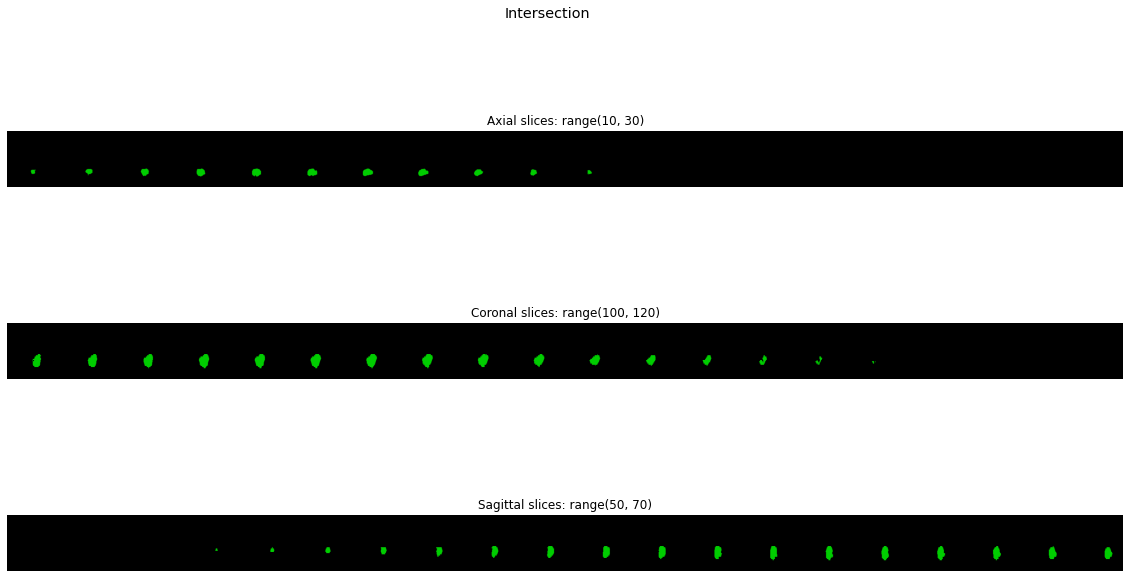

GTV DSC: 0.3179892685682011


In [9]:
def ensemble_intersection(prob_map_1, prob_map_2):
    mask_1 = prob_map_1 > 0.5
    mask_2 = prob_map_2 > 0.5
    output_mask = mask_1 * mask_2
    return output_mask

output_mask = ensemble_intersection(prob_map_2d_np, prob_map_3d_np)


# Display
notebook_utils.display_image_np(output_mask, spacing=spacing, is_label=True,
                                 sagittal_idxs=range(50,70),
                                 coronal_idxs=range(100,120),
                                 axial_idxs=range(10,30),
                                 title="Intersection")

dsc = dc(output_mask, true_gtv_np)
print("GTV DSC:", dsc)